In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
n = 2048
nz = 32#n
nz_fac = 1#nz//32
ntheta = 1500
t_unet_per_vox = 29.00 # nanoseconds
df = pd.read_csv(f'/data02/MyArchive/aisteer_3Dencoders/tmp_data/time_logs/runtime_M_a07_n{n}_nz32_ntheta{ntheta}.csv')

In [3]:
df['nz'] *= nz_fac
df['t_tot'] = df['t_tot']*nz_fac
df['$N(v)$'] = df['nz']*df['n']*df['n']*df['r_fac']
df['t_seg'] = df['$N(v)$']*t_unet_per_vox*1.e-9
df['t_fbp'] = df['t_tot'] - df['t_seg']
time_unit = "seconds"

In [4]:
df['$t^v_{seg}$'] = df['t_seg']/df['$N(v)$']*1.0e9
df['$t^v_{fbp}$'] = df['t_fbp']/df['$N(v)$']*1.0e9
df['$t^v_{tot}$'] = df['t_tot']/df['$N(v)$']*1.0e9

In [5]:
df['${1/r}$'] = 1.0/df['r_fac']
df['speedup-fbp'] = df['t_fbp'].iloc[-1]/df['t_fbp']
df['speedup-tot'] = df['t_tot'].iloc[-1]/df['t_tot']
df['speedup-seg'] = df['t_seg'].iloc[-1]/df['t_seg']

In [6]:
df

,r_fac,ntheta,nz,n,t_tot,$N(v)$,t_seg,t_fbp,$t^v_{seg}$,$t^v_{fbp}$,$t^v_{tot}$,${1/r}$,speedup-fbp,speedup-tot,speedup-seg
0,0.010000,1500.0,32.0,2048.0,0.372812,1.342177e+06,0.038923,0.333889,29.0,248.766844,277.766844,100.000000,5.847349,15.677272,100.000000
1,0.016681,1500.0,32.0,2048.0,0.441732,2.238887e+06,0.064928,0.376804,29.0,168.299739,197.299739,59.948425,5.181384,13.231289,59.948425
2,0.027826,1500.0,32.0,2048.0,0.456299,3.734688e+06,0.108306,0.347993,29.0,93.178575,122.178575,35.938137,5.610363,12.808887,35.938137
3,0.046416,1500.0,32.0,2048.0,0.543217,6.229835e+06,0.180665,0.362551,29.0,58.195976,87.195976,21.544347,5.385076,10.759394,21.544347
4,0.077426,1500.0,32.0,2048.0,0.712199,1.039199e+07,0.301368,0.410831,29.0,39.533411,68.533411,12.915497,4.752239,8.206532,12.915497
5,0.129155,1500.0,32.0,2048.0,1.040847,1.733489e+07,0.502712,0.538135,29.0,31.043482,60.043482,7.742637,3.628022,5.615312,7.742637
6,0.215443,1500.0,32.0,2048.0,1.491386,2.891633e+07,0.838574,0.652812,29.0,22.575890,51.575890,4.641589,2.990703,3.918960,4.641589
7,0.359381,1500.0,32.0,2048.0,2.284024,4.823535e+07,1.398825,0.885199,29.0,18.351665,47.351665,2.782559,2.205568,2.558940,2.782559
8,0.599484,1500.0,32.0,2048.0,3.659377,8.046141e+07,2.333381,1.325996,29.0,16.479905,45.479905,1.668101,1.472377,1.597179,1.668101
9,1.000000,1500.0,32.0,2048.0,5.844681,1.342177e+08,3.892314,1.952367,29.0,14.546264,43.546264,1.000000,1.000000,1.000000,1.000000


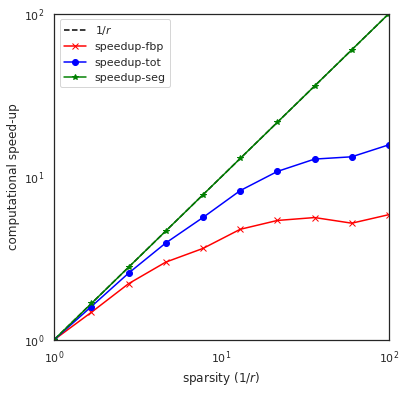

In [7]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-fbp', 'speedup-tot', 'speedup-seg']
colors = ['black', 'red', 'blue', 'green']
markers = ['--', 'x-', 'o-', '*-']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()

Text(0.5, 1.0, 'ntheta = 1500, n = 2048, nz = 32')

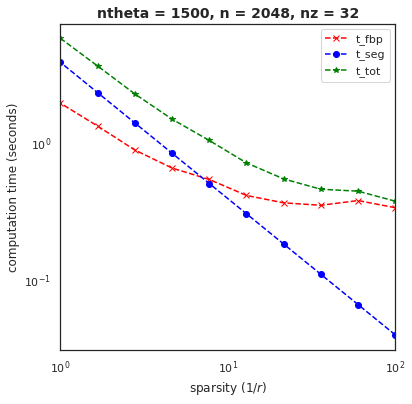

In [8]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['t_fbp', 't_seg', 't_tot']
colors = ['red', 'blue', 'green']
markers = ['x--', 'o--', '*--']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel(f"computation time ({time_unit})")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
# ax.set_ylim([1,100])
ax.legend()
ax.legend()
ax.set_title(f"ntheta = {ntheta}, n = {n}, nz = {nz}", fontsize = 14, fontweight = "bold")